In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [66]:
cd ..

/Users/Faliha/Dropbox/Faliha Zikra MIS @ SCU/Machine learning/MachineLearning


In [98]:
df_train = pd.read_csv('new_df.csv')


In [99]:
df_train.head()

,Unnamed: 0,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,...,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Paid_more_avg,Num_Paid_more_avg,propHigh,luxury
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,...,13716,227,0,334093,0,1,0,19,0.542857,0
1,1,1000017,P00069042,M,51-55,1,C,0,0,3,...,13716,227,0,1425995,0,5,1,85,0.739130,1
2,2,1000023,P00069042,M,36-45,0,B,3,1,3,...,13716,227,0,1670998,0,6,0,60,0.350877,0
3,3,1000030,P00069042,F,36-45,7,C,3,0,3,...,13716,227,0,261584,0,1,0,10,0.322581,0
4,4,1000073,P00069042,M,18-25,4,A,4+,0,3,...,13716,227,0,1428303,0,5,0,70,0.522388,0


In [100]:
df_train['Product_ID_x'] = df_train['Product_ID_x'].str[1:]# Drop the first character ‘P’ from product id
df_train = df_train.astype({'Product_ID_x':int}) # Recast all strings as ints

In [101]:
df_train.drop(['Unnamed: 0','Product_Category_3','Product_Category_2', 'Mean_Purchase_price', 'Min_purchase_price', 'Max_purchase_price',
         'luxury', 'Amount_user_spent','High_spender','Paid_more_avg', 'Num_Paid_more_avg', 'propHigh'], axis=1, inplace=True)

In [102]:
df=pd.get_dummies(df_train, columns=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years'])

In [103]:
df.columns

Index(['User_ID_x', 'Product_ID_x', 'Marital_Status', 'Product_Category_1',
       'Purchase_price_x', 'User_prod_bought', 'Quantity_sold', 'Popular_item',
       'User_category', 'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [104]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# df = df_train.apply(encoder.fit_transform)

In [105]:
from sklearn.model_selection import train_test_split


X_values = df.drop(columns=['Purchase_price_x',])
y_values = df['Purchase_price_x']
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values,test_size=0.20, random_state=42)



In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 47 columns):
User_ID_x                        550068 non-null int64
Product_ID_x                     550068 non-null int64
Marital_Status                   550068 non-null int64
Product_Category_1               550068 non-null int64
Purchase_price_x                 550068 non-null int64
User_prod_bought                 550068 non-null int64
Quantity_sold                    550068 non-null int64
Popular_item                     550068 non-null int64
User_category                    550068 non-null int64
Gender_F                         550068 non-null uint8
Gender_M                         550068 non-null uint8
Age_0-17                         550068 non-null uint8
Age_18-25                        550068 non-null uint8
Age_26-35                        550068 non-null uint8
Age_36-45                        550068 non-null uint8
Age_46-50                        550068 non-null uint8
Age_51-55

In [107]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [108]:
y_pred = rfr.predict(X_test)

In [109]:
from sklearn.metrics import mean_squared_error
import math

np.sqrt(mean_squared_error(y_test, y_pred))

2739.7855357004382

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV




# max_features = ['auto', 'sqrt',0.2]
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 7, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 5)]




# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(100, 2000, num = 50)]

# bootstrap = [True]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}


In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
#                                verbose=0, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train_ts, y_train)

In [ ]:
# rf_random.best_estimator_

In [ ]:
# rf_random.best_params_

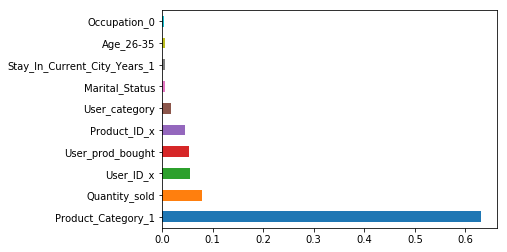

In [110]:
feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')